<a href="https://colab.research.google.com/github/victoriamaccari/proyecto/blob/master/series_temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

In [26]:
url= "https://raw.githubusercontent.com/victoriamaccari/proyecto/master/GrowthDJ.csv"

In [27]:
df= pd.read_csv(url)

In [28]:
#elimino columna Unnamed:0
df.drop(df.columns[[0]], axis='columns', inplace=True)

In [29]:
#Comprobar si hay valores perdidos
pd.isnull(df).any()

oil           False
inter         False
oecd          False
gdp60          True
gdp85          True
gdpgrowth      True
popgrowth      True
invest        False
school         True
literacy60     True
dtype: bool

In [30]:
#Metodo fillna, asigna el valor previo o el ultimo valor valido
df.fillna(method='ffill', inplace=True)

In [31]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]



In [32]:
import pandas as pd
from datetime import datetime
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
date_rng = pd.date_range(start='1960/01/01', end='1960/12/31', periods=120)
print(date_rng)

DatetimeIndex([          '1960-01-01 00:00:00',
               '1960-01-04 01:36:48.403361344',
               '1960-01-07 03:13:36.806722689',
               '1960-01-10 04:50:25.210084033',
               '1960-01-13 06:27:13.613445378',
               '1960-01-16 08:04:02.016806722',
               '1960-01-19 09:40:50.420168067',
               '1960-01-22 11:17:38.823529411',
               '1960-01-25 12:54:27.226890756',
               '1960-01-28 14:31:15.630252101',
               ...
               '1960-12-03 09:28:44.369747900',
               '1960-12-06 11:05:32.773109244',
               '1960-12-09 12:42:21.176470588',
               '1960-12-12 14:19:09.579831932',
               '1960-12-15 15:55:57.983193276',
               '1960-12-18 17:32:46.386554620',
               '1960-12-21 19:09:34.789915964',
               '1960-12-24 20:46:23.193277312',
               '1960-12-27 22:23:11.596638656',
                         '1960-12-31 00:00:00'],
              dtype=

In [33]:
ts = pd.DataFrame(date_rng, columns=['date'])

In [34]:
df3=pd.merge(df1, ts, right_index=True, left_index=True)
df3.head()

,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60,date
0,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0,1960-01-01 00:00:00.000000000
1,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0,1960-01-04 01:36:48.403361344
2,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0,1960-01-07 03:13:36.806722689
3,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,5.0,1960-01-10 04:50:25.210084033
4,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0,1960-01-13 06:27:13.613445378


In [35]:
df4=df3.loc[:,['gdp60','date']]
print(df4)

       gdp60                          date
0     2485.0 1960-01-01 00:00:00.000000000
1     1588.0 1960-01-04 01:36:48.403361344
2     1116.0 1960-01-07 03:13:36.806722689
3      959.0 1960-01-10 04:50:25.210084033
4      529.0 1960-01-13 06:27:13.613445378
5      755.0 1960-01-16 08:04:02.016806722
6      889.0 1960-01-19 09:40:50.420168067
7      838.0 1960-01-22 11:17:38.823529411
8      908.0 1960-01-25 12:54:27.226890756
9     1009.0 1960-01-28 14:31:15.630252101
10     907.0 1960-01-31 16:08:04.033613445
11     533.0 1960-02-03 17:44:52.436974790
12    1307.0 1960-02-06 19:21:40.840336134
13     799.0 1960-02-09 20:58:29.243697479
14    1009.0 1960-02-12 22:35:17.647058823
15     746.0 1960-02-16 00:12:06.050420168
16    1386.0 1960-02-19 01:48:54.453781512
17     944.0 1960-02-22 03:25:42.857142857
18     431.0 1960-02-25 05:02:31.260504202
19     863.0 1960-02-28 06:39:19.663865546
20    1194.0 1960-03-02 08:16:08.067226891
21     455.0 1960-03-05 09:52:56.470588235
22     737.

In [36]:
df4.head()


,gdp60,date
0,2485.0,1960-01-01 00:00:00.000000000
1,1588.0,1960-01-04 01:36:48.403361344
2,1116.0,1960-01-07 03:13:36.806722689
3,959.0,1960-01-10 04:50:25.210084033
4,529.0,1960-01-13 06:27:13.613445378


In [37]:
df4.set_index('date',inplace=True)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller




In [39]:
  import statsmodels
  import statsmodels.api as sm
  import statsmodels.formula.api as smf

In [40]:
pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.12.0)


In [41]:
def test_stationarity(timeseries):
  rolmean=pd.rolling_mean(timeseries, window=12)
  rolstd=pd.rolling_std(timeseries, window=12)
  orig=plt.plot(timeseries, color='blue', label='original')
  mean=plt.plot(rolmean, color='red', label='media movil')
  std=plt.plot(rolstd, color='black', label= 'desviacion estandar')
  plt.legend(loc='best')
  plt.title('media movil y desviacion estandar')
  plt.show(block=False)
  test_stationarity(df4['gdp60'])

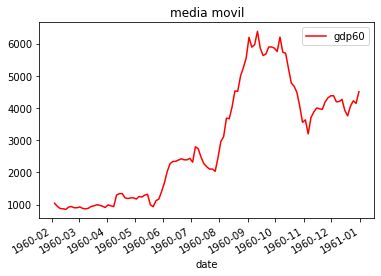

In [42]:
#calculo de media movil

moving_avg = df4.rolling(12).mean()
df4['gdp60'].plot
moving_avg.plot(label='media movil', color='red')
plt.title('media movil')
plt.legend(loc='best')

Text(0.5, 1.0, 'varianza diaria')

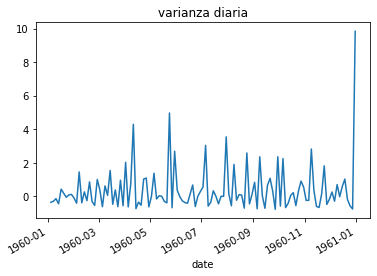

In [43]:
#calculo de la varianza
variacion_diaria = df4['gdp60'] / df4['gdp60'].shift(1)-(1)
df4['var_diaria'] = variacion_diaria
df4['var_diaria'][:5]
#grafico de la varianza
plot= df4['var_diaria'].plot()
plt.title('varianza diaria')

Text(0.5, 1.0, 'tendencia')

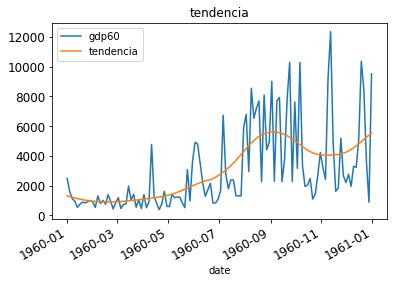

In [44]:
#calculo de la tendencia sobre los datos
ciclo, tend = sm.tsa.filters.hpfilter(df4['gdp60'])
df4['tendencia']= tend
df4[['gdp60', 'tendencia']].plot(fontsize=12);
plt.title('tendencia')


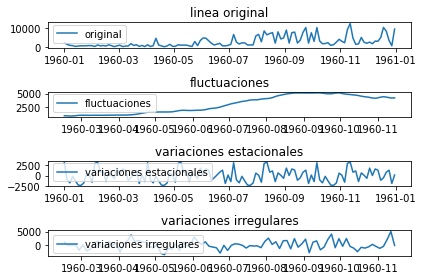

In [45]:
#descomposicion de los componentes de la serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(df4['gdp60'], freq=30)
trend= descomposicion.trend #descomposicion de tendencia
seasonal= descomposicion.seasonal #descomposicion de estacionariedad
residual= descomposicion.resid #descomposicion del residual

plt.subplot(411)
plt.plot(df4['gdp60'], label= 'original')
plt.title('linea original')
plt.legend(loc= 'best')
plt.subplot(412)
plt.plot(trend, label= 'fluctuaciones')
plt.title('fluctuaciones')
plt.legend(loc= 'best')
plt.subplot(413)
plt.plot(seasonal, label='variaciones estacionales')
plt.title('variaciones estacionales')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='variaciones irregulares')
plt.title('variaciones irregulares')
plt.legend(loc='best')
plt.tight_layout()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:


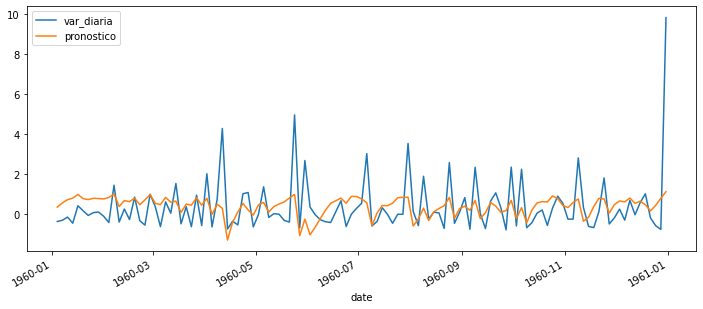

In [46]:
#aplicacion del modelo ARIMA
modelo = sm.tsa.ARIMA(df4['var_diaria'].iloc[1:], order=(1,0,1))
resultados = modelo.fit(disp=-1)
df4['pronostico'] = resultados.fittedvalues
plot = df4[['var_diaria', 'pronostico']].plot(figsize=(12,5))

In [47]:
#https://www.youtube.com/watch?v=NeRjp3GIJgA